In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
original_masking_df = pd.read_csv('/media/zhaoyang-new/workspace/KarSim/KarSimulator/Metadata/hg38_cnv_masks.bed', sep='\t')
original_masking_df['StartPos'] = original_masking_df['StartPos'].astype(int)
original_masking_df['EndPos'] = original_masking_df['EndPos'].astype(int)

In [3]:
original_masking_df

,Chr,StartPos,EndPos
0,1,14453,1674800
1,1,1899027,3864922
2,1,4085621,4285615
3,1,4920445,5092120
4,1,5330209,5493329
...,...,...,...
382,24,15800000,16122374
383,24,16155235,20893633
384,24,20916193,21144650
385,24,21180878,22737164


In [4]:
superdup_masking_df = pd.read_csv(
    '/media/zhaoyang-new/workspace/KarSim/KarSimulator/Metadata/genomicSuperDups.bed', 
    sep='\t', usecols=[0,1,2], names=['Chr', 'StartPos', 'EndPos'])

In [7]:
len(superdup_masking_df[superdup_masking_df['EndPos'] - superdup_masking_df['StartPos'] > 100000])

947

In [8]:
superdup_masking_df = superdup_masking_df[superdup_masking_df['EndPos'] - superdup_masking_df['StartPos'] > 100000]

In [9]:
superdup_masking_df

,Chr,StartPos,EndPos
174,1,347968,478559
175,1,347968,529769
194,1,355345,485660
196,1,357216,499005
219,1,422078,535988
...,...,...,...
64058,24,25566691,25686389
64064,24,25967291,26196584
64065,24,25967291,26135950
64074,24,26211449,26332449


In [10]:
centromere_df = pd.read_csv(
    '/media/zhaoyang-new/workspace/KarSim/KarSimulator/Metadata/Full_Genome_Indices.txt', 
    sep='\t', usecols=[0,3,4], names=['Chr', 'StartPos', 'EndPos'])
centromere_df['Chr'] = centromere_df['Chr'].str.replace('Chr', '')
centromere_df['Chr'] = centromere_df['Chr'].str.replace('X', '23')
centromere_df['Chr'] = centromere_df['Chr'].str.replace('Y', '24')

In [11]:
t1_df = pd.read_csv(
    '/media/zhaoyang-new/workspace/KarSim/KarSimulator/Metadata/Full_Genome_Indices.txt', 
    sep='\t', usecols=[0,2], names=['Chr', 'EndPos'])
t1_df['StartPos'] = 0
t1_df['Chr'] = t1_df['Chr'].str.replace('Chr', '')
t1_df['Chr'] = t1_df['Chr'].str.replace('X', '23')
t1_df['Chr'] = t1_df['Chr'].str.replace('Y', '24')
t1_df = t1_df[['Chr', 'StartPos', 'EndPos']]
t1_df['EndPos'] = t1_df['EndPos'] - 1
t1_df

,Chr,StartPos,EndPos
0,1,0,9999
1,2,0,9999
2,3,0,9999
3,4,0,9999
4,5,0,9999
5,6,0,59999
6,7,0,9999
7,8,0,59999
8,9,0,9999
9,10,0,9999


In [12]:
t2_df = pd.read_csv(
    '/media/zhaoyang-new/workspace/KarSim/KarSimulator/Metadata/Full_Genome_Indices.txt', 
    sep='\t', usecols=[0,1,5], names=['Chr', 'EndPos', 'StartPos'])
t2_df['Chr'] = t2_df['Chr'].str.replace('Chr', '')
t2_df['Chr'] = t2_df['Chr'].str.replace('X', '23')
t2_df['Chr'] = t2_df['Chr'].str.replace('Y', '24')
t2_df = t2_df[['Chr', 'StartPos', 'EndPos']]
t2_df['StartPos'] = t2_df['StartPos'] + 1
t2_df['EndPos'] = t2_df['EndPos'] - 1
t2_df

,Chr,StartPos,EndPos
0,1,248946422,248956421
1,2,242183529,242193528
2,3,198235559,198295558
3,4,190204555,190214554
4,5,181478259,181538258
5,6,170745979,170805978
6,7,159335973,159345972
7,8,145078636,145138635
8,9,138334717,138394716
9,10,133787422,133797421


In [16]:
merged_df = pd.concat([centromere_df, t1_df, t2_df, original_masking_df, superdup_masking_df], ignore_index=True)
merged_df['Chr'] = merged_df['Chr'].astype(int)
merged_df.sort_values(by=['Chr', 'StartPos', 'EndPos'], inplace=True)

In [17]:
merged_df

,Chr,StartPos,EndPos
24,1,0,9999
72,1,14453,1674800
459,1,347968,478559
460,1,347968,529769
461,1,355345,485660
...,...,...,...
1403,24,25967291,26135950
1402,24,25967291,26196584
1404,24,26211449,26332449
1405,24,26530035,26637925


In [18]:
merged_df.to_csv('../Metadata/merged_masking.bed', index=False, sep='\t')

### Analyze SuperDup

In [ ]:
## Check if SuperDups have intervals not included in the original masking file
mask = superdup_masking_df.apply(
    lambda row: original_masking_df[
        (original_masking_df['Chr'] == row['Chr']) &
        (original_masking_df['StartPos'] <= row['StartPos']) &
        (original_masking_df['EndPos'] >= row['EndPos'])
    ].empty,
    axis=1
)

# Filter superdup_masking_df to get intervals that are not completely inside original_masking_df
intervals_not_in_original = superdup_masking_df[mask]

# Display intervals that are not completely inside original_masking_df
print(intervals_not_in_original)

In [57]:
superdup_masking_df['length'] = superdup_masking_df['EndPos'] - superdup_masking_df['StartPos']

In [58]:
superdup_masking_df

,Chr,StartPos,EndPos,length
0,1,10000,87112,77112
1,1,10000,20818,10818
2,1,10000,19844,9844
3,1,10169,37148,26979
4,1,10464,40733,30269
...,...,...,...,...
64211,24,56862674,56866758,4084
64212,24,56862674,56866758,4084
64213,24,56866349,56867465,1116
64214,24,56878710,56879827,1117


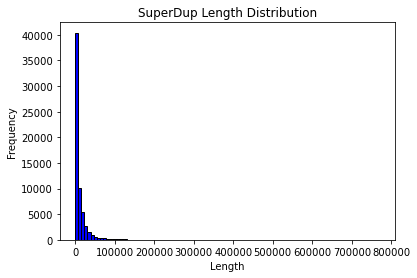

In [63]:
plt.hist(superdup_masking_df['length'], bins=100, color='blue', edgecolor='black')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('SuperDup Length Distribution')
plt.show()

In [64]:
superdup_masking_df.shape

(64216, 4)

In [67]:
len(superdup_masking_df[superdup_masking_df['length'] > 50000])

2797

In [65]:
len(superdup_masking_df[superdup_masking_df['length'] > 100000])

947

In [70]:
len(superdup_masking_df[superdup_masking_df['length'] > 200000])

178

In [66]:
len(superdup_masking_df[superdup_masking_df['length'] > 500000])

10

In [68]:
superdup_short = superdup_masking_df[superdup_masking_df['length'] < 100000]

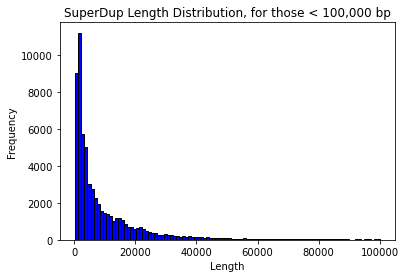

In [69]:
plt.hist(superdup_short['length'], bins=100, color='blue', edgecolor='black')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('SuperDup Length Distribution, for those < 100,000 bp')
plt.show()

## Analyze Original Mask

In [71]:
original_masking_df['length'] = original_masking_df['EndPos'] - original_masking_df['StartPos']

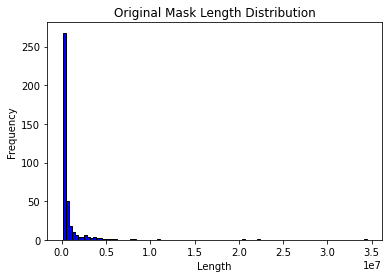

In [72]:
plt.hist(original_masking_df['length'], bins=100, color='blue', edgecolor='black')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Original Mask Length Distribution')
plt.show()

In [73]:
original_masking_df.shape

(387, 4)

In [81]:
## All original masking region are big enough
len(original_masking_df[original_masking_df['length'] > 100000])

387